KeyboardInterrupt: 

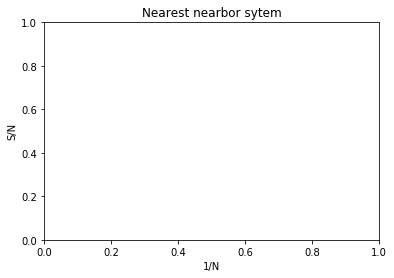

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import trange
%matplotlib inline


def generate_network_a(N):
    # Generate neighbours
    network = np.zeros((N,N), dtype=np.int8)
    for i in range (N):
        if i < N-1:
            network[i,i+1] = 1
            network[i+1,i] = 1
    network[0,N-1] = 1
    network[N-1,0] = 1
    return network


def generate_network_b(N):
    # Generate neighbours
    network = np.zeros((N,N), dtype=np.int8)
    for i in range (N):
        if i < N-1:
            network[i,i+1] = 1
            network[i+1,i] = 1
        if i < N-2:
            network[i,i+2] = 1
            network[i+2,i] = 1
    network[0,N-1] = 1
    network[N-1,0] = 1
    network[0,N-2] = 1
    network[1,N-1] = 1
    network[N-2,0] = 1
    network[N-1,1] = 1
    return network


def swap_bonds(network, node1, node2, r1=None, r2=None):
    N = network.shape[0]
    diags = [1, -1, N-1, -N+1]
    old = network.copy()


    node1nearest = [(node1+1) % N, (node1-1) % N]
    node2nearest = [(node2+1) % N, (node2-1) % N]
    non_neighbour = network - sum([np.eye(N, k=n, dtype=np.int8) for n in diags])


    i1 = node1
    i2 = node2


    r1 = np.random.randint(0, 2)
    r2 = np.random.randint(0, 2)


    row1 = non_neighbour[i1]
    bonds1 = np.where(row1)[0]
    row2 = non_neighbour[i2]
    bonds2 = np.where(row2)[0]


    j1 = bonds1[r1]
    j2 = bonds2[r2]

    if (j1 in node2nearest) or (j2 in node1nearest):
        return network



    i_to_delete = [i1, j1, i2, j2]
    j_to_delete = [j1, i1, j2, i2]
    network[i_to_delete, j_to_delete] = 0
    sum_delete = network.sum()
    i_to_create = [i1, j1, i2, j2]
    j_to_create = [j2, i2, j1, i1]
    network[i_to_create, j_to_create] = 1
    sum_create = network.sum()


    if sum_delete + 4 != sum_create:
        return old

    return network



def breadth_first_search(occupied, network, start_i):

    cluster = [start_i]
    queue = np.where(network[start_i])[0].tolist()

    while queue:
        i = queue.pop(0)

        neighbours = np.where(network[i])[0].tolist()

        if occupied[i] and (i not in cluster):
            cluster.append(i)
            queue.extend(neighbours)

    return cluster


def find(occupied, network):
    occupied_i = np.where(occupied)[0]
    found = []
    sizes = []
    for i in occupied_i:
        if i in found:
            continue
            
        cluster = breadth_first_search(occupied, network, i)
        found.extend(cluster)
        sizes.append(len(cluster))
    return max(sizes)


def percolation1():
    network_size = [10**i for i in [5, 4, 3, 2]]
    prop = np.linspace(0.1,0.9,num=9)
    number_trials = 100

    fig, ax = plt.subplots()
    plt.title('Nearest nearbor sytem')
    plt.xlabel('1/N')
    plt.ylabel('S/N')
    for k in trange(len(prop)):

        
        p = prop[k]
        for m in trange(len(network_size)):
            size = network_size[m]
            network = generate_network_a(size)
            sizes = []
            average_largest = []
            average_std = []
            for n in trange(number_trials, leave=False):
                occupied = np.random.uniform(size=size)
                mask = occupied < p
                occupied[mask] = 1
                occupied[~mask] = 0
                largest = find(occupied, network)
                sizes.append(largest)

            average_largest.append(np.mean(sizes))
            average_std.append(np.std(sizes))

            average_largest = np.array(average_largest)/np.array(network_size)
            average_std = np.array(average_std)/np.array(network_size)
            x = []
            print(average_largest)
            for i in range(len(network_size)):
                x.append(1/network_size[i])
            
            ax.errorbar(x, average_largest, average_std,label=p)
            ax.set_xscale('log')
            
    ax.legend(bbox_to_anchor=(1.5,1))
    return plt.show()

def percolation2():
    network_size = [10**i for i in [5, 4, 3, 2]]
    prop = np.linspace(0.1,0.9,num=9)
    number_trials = 100

    
    # probs = np.linspace(0.1, 0.9, number_probabilities)

    fig, ax = plt.subplots()
    plt.title('Nearest nearbor sytem')
    plt.xlabel('1/N')
    plt.ylabel('S/N')
    for k in trange(len(prop)):

        
        p = prop[k]
        for m in trange(len(network_size)):
            size = network_size[m]
            node1, node2 = np.random.choice(size, size=2, replace=False)
            network = generate_network_b(size)
            for over in range(100):
                network = swap_bonds(network,node1,node2)
            sizes = []
            average_largest = []
            average_std = []
            for n in trange(number_trials, leave=False):
                occupied = np.random.uniform(size=size)
                mask = occupied < p
                occupied[mask] = 1
                occupied[~mask] = 0
                largest = find_largest_cluster(occupied, network)
                sizes.append(largest)

            average_largest.append(np.mean(sizes))
            average_std.append(np.std(sizes))

            average_largest = np.array(average_largest)/np.array(network_size)
            average_std = np.array(average_std)/np.array(network_size)
            x = []
            print(average_largest)
            for i in range(len(network_size)):
                x.append(1/network_size[i])
            
            ax.errorbar(x, average_largest, average_std,label=p)
            ax.set_xscale('log')
            
    ax.legend(bbox_to_anchor=(1.5,1))
    return plt.show()

if __name__ == "__main__":
    percolation1()
#    percolation2()